In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize  import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer

import gensim
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras import layers
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JDEGUZMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JDEGUZMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\JDEGUZMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JDEGUZMAN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LOADING CSV 

In [44]:
df = pd.read_csv("Twitter.csv")
df 

,clean_text,category,category_sentiment
0,when modi promised “minimum government maximum...,-1,negative
1,talk all the nonsense and continue all the dra...,0,neutral
2,what did just say vote for modi welcome bjp t...,1,positive
3,asking his supporters prefix chowkidar their n...,1,positive
4,answer who among these the most powerful world...,1,positive
...,...,...,...
177981,'I'm not satisfied with The Hills finale. gon...,-1,negative
177982,this sucks,-1,negative
177983,this is bad,-1,negative
177984,I am not okay with this,-1,negative


DROPPING DUPLICATES AND NULL VALUES

In [45]:
# removing neutral category
df = df[df.category != 0.0]

# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115273 entries, 0 to 177985
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   clean_text          115273 non-null  object
 1   category            115273 non-null  int64 
 2   category_sentiment  115273 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.5+ MB


In [46]:
# Dropping duplicates
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115273 entries, 0 to 177985
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   clean_text          115273 non-null  object
 1   category            115273 non-null  int64 
 2   category_sentiment  115273 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.5+ MB


In [47]:
# Checking null values
df.isnull().sum()

clean_text            0
category              0
category_sentiment    0
dtype: int64

VISUALIZING DATA

Text(0.5, 1.0, 'Dataset Labels Distribution')

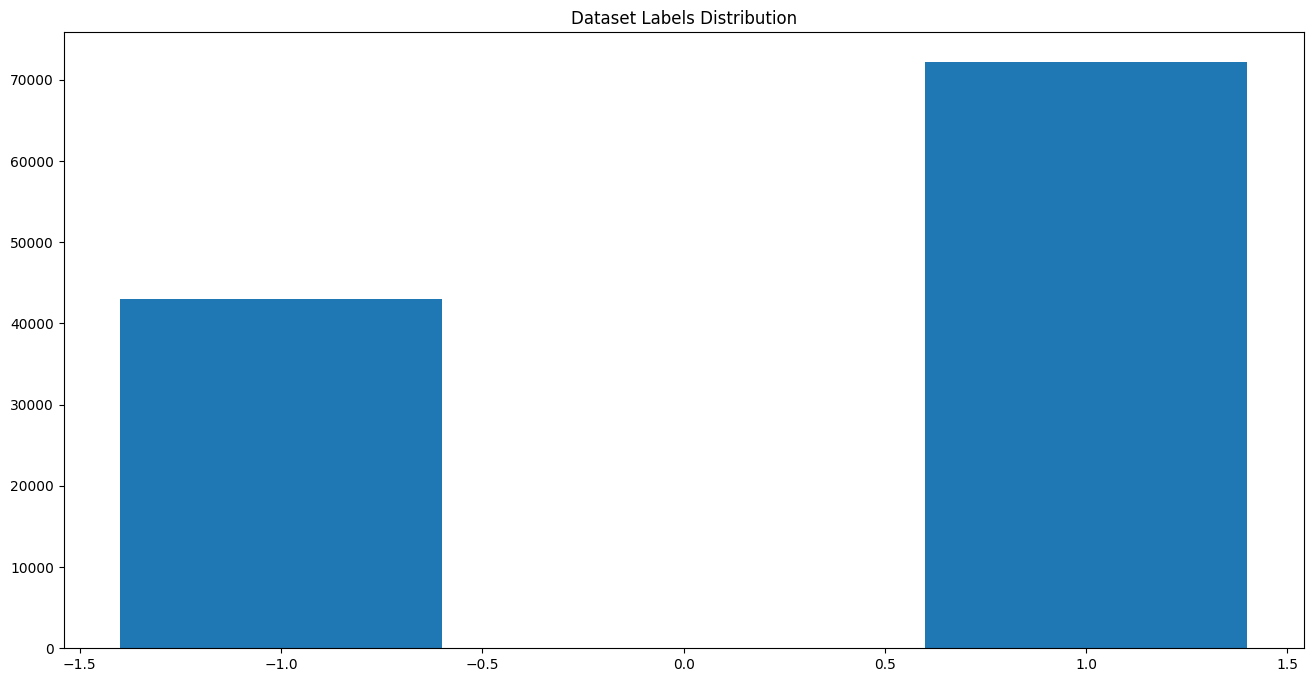

In [48]:
category_cnt = Counter(df.category)

plt.figure(figsize=(16, 8))
plt.bar(category_cnt.keys(), category_cnt.values())
plt.title("Dataset Labels Distribution")

In [49]:
df["category"].value_counts()

 1    72254
-1    43019
Name: category, dtype: int64

DATA MANIPULATION

In [50]:
# DELETING UNNECESSARY CHARACTERS

def clean_text(df, field):
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.replace("#[^a-zA-Z0-9_]+"," ")
    df[field] = df[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    df[field] = df[field].str.replace(r"http\S+","")
    df[field] = df[field].str.lower()
    return df

clean_text(df, "clean_text")

C:\Users\JDEGUZMAN\AppData\Local\Temp\ipykernel_16096\3263688739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[field] = df[field].str.replace(r"@"," at ")
C:\Users\JDEGUZMAN\AppData\Local\Temp\ipykernel_16096\3263688739.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[field] = df[field].str.replace("#[^a-zA-Z0-9_]+"," ")
C:\Users\JDEGUZMAN\AppData\Local\Temp\ipykernel_16096\3263688739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[fiel

,clean_text,category,category_sentiment
0,when modi promised minimum government maximum...,-1,negative
2,what did just say vote for modi welcome bjp t...,1,positive
3,asking his supporters prefix chowkidar their n...,1,positive
4,answer who among these the most powerful world...,1,positive
8,with upcoming election india saga going import...,1,positive
...,...,...,...
177981,'i'm not satisfied with the hills finale gon...,-1,negative
177982,this sucks,-1,negative
177983,this is bad,-1,negative
177984,i am not okay with this,-1,negative


In [51]:
# Tokenizing tweets
# Tokenization is the process of breaking text up into smaller chunks

df["clean_text"] = df["clean_text"].apply(word_tokenize)
df.head()

C:\Users\JDEGUZMAN\AppData\Local\Temp\ipykernel_16096\2395634738.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"] = df["clean_text"].apply(word_tokenize)


,clean_text,category,category_sentiment
0,"[when, modi, promised, minimum, government, ma...",-1,negative
2,"[what, did, just, say, vote, for, modi, welcom...",1,positive
3,"[asking, his, supporters, prefix, chowkidar, t...",1,positive
4,"[answer, who, among, these, the, most, powerfu...",1,positive
8,"[with, upcoming, election, india, saga, going,...",1,positive


In [52]:
# Lower casing clean text.

df["clean_text"] = df["clean_text"].apply(
    lambda x: [word.lower() for word in x])

df.head()

C:\Users\JDEGUZMAN\AppData\Local\Temp\ipykernel_16096\1989819030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"] = df["clean_text"].apply(


,clean_text,category,category_sentiment
0,"[when, modi, promised, minimum, government, ma...",-1,negative
2,"[what, did, just, say, vote, for, modi, welcom...",1,positive
3,"[asking, his, supporters, prefix, chowkidar, t...",1,positive
4,"[answer, who, among, these, the, most, powerfu...",1,positive
8,"[with, upcoming, election, india, saga, going,...",1,positive


In [53]:
# Removing stopwords
# Stop words are words which occur frequently in a corpus. e.g a, an, the, in. 
# Frequently occurring words are removed from the corpus for the sake of text-normalization.
stop_words = set(stopwords.words("english"))

# Removing "not" in stopwords
stop_words.remove("not")

df["clean_text"] = df["clean_text"].apply(
    lambda x: [word for word in x if word not in stop_words])

df.head()

C:\Users\JDEGUZMAN\AppData\Local\Temp\ipykernel_16096\1897636534.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"] = df["clean_text"].apply(


,clean_text,category,category_sentiment
0,"[modi, promised, minimum, government, maximum,...",-1,negative
2,"[say, vote, modi, welcome, bjp, told, rahul, m...",1,positive
3,"[asking, supporters, prefix, chowkidar, names,...",1,positive
4,"[answer, among, powerful, world, leader, today...",1,positive
8,"[upcoming, election, india, saga, going, impor...",1,positive


In [54]:
# POS tagging is the process of identifying parts of speech of a sentence. It is able to identify nouns, pronouns, 
# adjectives etc. in a sentence and assigns a POS token to each word.
# POS tagging of raw text is a fundamental building block of many NLP pipelines such as word-sense disambiguation, question answering and sentiment analysis.

# part of speech tagging 
df["clean_text"] = df["clean_text"].apply(nltk.tag.pos_tag)

df.head()

C:\Users\JDEGUZMAN\AppData\Local\Temp\ipykernel_16096\2077730116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"] = df["clean_text"].apply(nltk.tag.pos_tag)


,clean_text,category,category_sentiment
0,"[(modi, NNS), (promised, VBD), (minimum, JJ), ...",-1,negative
2,"[(say, VB), (vote, NN), (modi, FW), (welcome, ...",1,positive
3,"[(asking, VBG), (supporters, NNS), (prefix, VB...",1,positive
4,"[(answer, NN), (among, IN), (powerful, JJ), (w...",1,positive
8,"[(upcoming, JJ), (election, NN), (india, NN), ...",1,positive


In [55]:
def get_wordnet_pos(tag):
    if tag.startswith("J"):
        return wordnet.ADJ
    elif tag.startswith("V"):
        return wordnet.VERB
    elif tag.startswith("N"):
        return wordnet.NOUN
    elif tag.startswith("R"):
        return wordnet.ADV
    else:
        return wordnet.NOUN


df["clean_text"] = df["clean_text"].apply(
    lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

df.head()

C:\Users\JDEGUZMAN\AppData\Local\Temp\ipykernel_16096\2679872921.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"] = df["clean_text"].apply(


,clean_text,category,category_sentiment
0,"[(modi, n), (promised, v), (minimum, a), (gove...",-1,negative
2,"[(say, v), (vote, n), (modi, n), (welcome, a),...",1,positive
3,"[(asking, v), (supporters, n), (prefix, v), (c...",1,positive
4,"[(answer, n), (among, n), (powerful, a), (worl...",1,positive
8,"[(upcoming, a), (election, n), (india, n), (sa...",1,positive


In [56]:
# Applying word lemmatizer.
# It is another process of reducing inflection from words. The way its different from stemming is that it reduces words to their origins which have actual meaning.

wnl = WordNetLemmatizer()

df["clean_text"] = df["clean_text"].apply(
    lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

df["clean_text"] = df["clean_text"].apply(
    lambda x: [word for word in x if word not in stop_words])

# Changing to str
df["clean_text"] = [" ".join(map(str, l)) for l in df["clean_text"]]

df.head()

C:\Users\JDEGUZMAN\AppData\Local\Temp\ipykernel_16096\3552637186.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"] = df["clean_text"].apply(
C:\Users\JDEGUZMAN\AppData\Local\Temp\ipykernel_16096\3552637186.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"] = df["clean_text"].apply(
C:\Users\JDEGUZMAN\AppData\Local\Temp\ipykernel_16096\3552637186.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,clean_text,category,category_sentiment
0,modi promise minimum government maximum govern...,-1,negative
2,say vote modi welcome bjp tell rahul main camp...,1,positive
3,ask supporter prefix chowkidar name modi great...,1,positive
4,answer among powerful world leader today trump...,1,positive
8,upcoming election india saga go important pair...,1,positive


In [57]:
# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

# Varaibles related to dataset
DATASET_COLUMNS = ["clean_text", "category_sentiment"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 92218
TEST size: 23055


In [58]:
# Word2Vec Model

vector_size = 300
window = 7
epochs = 32
min_count = 10

w2v_model = gensim.models.word2vec.Word2Vec(vector_size=vector_size, 
                                            window=window, 
                                            min_count=min_count, 
                                            workers=8)

In [59]:
# vocab creation

documents = [text.split() for text in df_train.clean_text] 
w2v_model.build_vocab(documents)

In [60]:
words = w2v_model.wv.key_to_index.keys()
vocab_size = len(words)
print("Vocab Size:", vocab_size)

Vocab Size: 8500


In [61]:
# training the model 

w2v_model.train(documents, total_examples=len(documents), epochs=epochs)

(38460980, 47033536)

In [62]:
w2v_model.wv.most_similar("bjp")

[('party', 0.4729442000389099),
 ('trs', 0.4401875436306),
 ('cadre', 0.4267219007015228),
 ('dmk', 0.4217594861984253),
 ('jds', 0.4123353064060211),
 ('bjd', 0.405007928609848),
 ('congress', 0.39978253841400146),
 ('ncp', 0.39896807074546814),
 ('candidate', 0.386739581823349),
 ('admk', 0.366615355014801)]

In [63]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.clean_text)

vocab_size = len(tokenizer.word_index) + 1
print("Total Words:", vocab_size)

Total Words: 72778


In [64]:
# Parameters related to KERAS

SEQUENCE_LENGTH = 300
EPOCHS = 20
BATCH_SIZE = 1024

x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.clean_text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.clean_text), maxlen=SEQUENCE_LENGTH)

x_train

array([[    0,     0,     0, ...,  3007,   106,  1115],
       [    0,     0,     0, ...,     5,   784,   474],
       [    0,     0,     0, ...,     1,   395,   126],
       ...,
       [    0,     0,     0, ...,   372,  2753,    38],
       [    0,     0,     0, ...,    75, 11707,   120],
       [    0,     0,     0, ...,   815, 14356,    28]])

In [65]:
labels = df_train.category_sentiment.unique().tolist()
labels

['positive', 'negative']

In [66]:
encoder = LabelEncoder()
encoder.fit(df_train.category_sentiment.tolist())

y_train = encoder.transform(df_train.category_sentiment.tolist())
y_test = encoder.transform(df_test.category_sentiment.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (92218, 1)
y_test (23055, 1)


In [67]:
embedding_matrix = np.zeros((vocab_size, vector_size))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(72778, 300)


In [68]:
embedding_layer = Embedding(vocab_size, 50)

In [69]:
model = Sequential()
model.add(embedding_layer)
model.add(layers.SimpleRNN(50,return_sequences=True))
model.add(layers.SimpleRNN(50))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 50)          3638900   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 50)          5050      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,649,051
Trainable params: 3,649,051
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(loss='binary_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])

In [71]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [72]:
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/20
82/82 [==============================] - 160s 2s/step - loss: 0.6157 - accuracy: 0.6716 - val_loss: 0.5164 - val_accuracy: 0.7599 - lr: 0.0010
Epoch 2/20
82/82 [==============================] - 256s 3s/step - loss: 0.4289 - accuracy: 0.8012 - val_loss: 0.4463 - val_accuracy: 0.7835 - lr: 0.0010
Epoch 3/20
82/82 [==============================] - 272s 3s/step - loss: 0.2908 - accuracy: 0.8788 - val_loss: 0.3741 - val_accuracy: 0.8399 - lr: 0.0010
Epoch 4/20
82/82 [==============================] - 279s 3s/step - loss: 0.2634 - accuracy: 0.8996 - val_loss: 0.3056 - val_accuracy: 0.8710 - lr: 0.0010
Epoch 5/20
82/82 [==============================] - 275s 3s/step - loss: 0.1821 - accuracy: 0.9321 - val_loss: 0.3888 - val_accuracy: 0.8364 - lr: 0.0010
Epoch 6/20
82/82 [==============================] - 328s 4s/step - loss: 0.1500 - accuracy: 0.9449 - val_loss: 0.4376 - val_accuracy: 0.8302 - lr: 0.0010
Epoch 7/20
82/82 [==============================] - 285s 3s/step - loss: 0.0

In [73]:
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY: ", score[1])
print("LOSS: ", score[0])

23/23 [==============================] - 11s 476ms/step - loss: 0.6230 - accuracy: 0.8526

ACCURACY:  0.8525699377059937
LOSS:  0.6230065226554871
